<a href="https://colab.research.google.com/github/avichhitwal/Sensor-Part-Failure/blob/main/sensordata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip uninstall pystan -y

Found existing installation: pystan 3.10.0
Uninstalling pystan-3.10.0:
  Successfully uninstalled pystan-3.10.0


In [2]:
!pip install pystan==2.19.1.1
!pip install fbprophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 70.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
ERROR: Operation cancelled by user
^C
^C


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeogm2l4v/q2m4cz8b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeogm2l4v/9bhjc3f9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87799', 'data', 'file=/tmp/tmpeogm2l4v/q2m4cz8b.json', 'init=/tmp/tmpeogm2l4v/9bhjc3f9.json', 'output', 'file=/tmp/tmpeogm2l4v/prophet_modelrefaq7cb/prophet_model-20250510135217.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:52:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:52:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


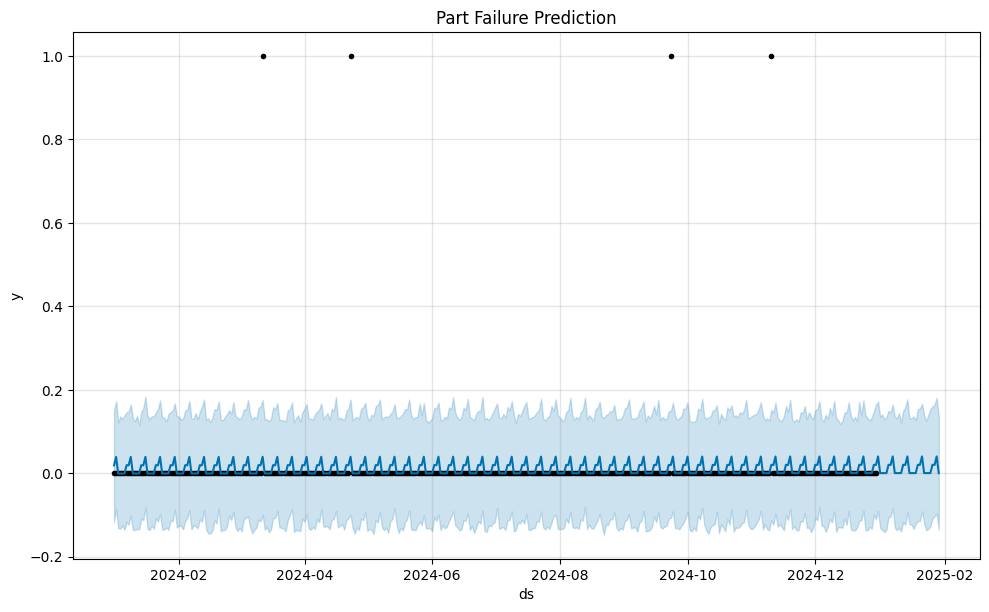

'/part_failure_forecast.csv'

In [2]:
# !pip install fbprophet

# Import necessary libraries
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt

# ... (rest of your code) ...

data = pd.read_csv('/dummy_sensor_data.csv')

# Prepare the data for Prophet
# Prophet requires columns 'ds' for the date and 'y' for the target variable
data['ds'] = pd.to_datetime(data['Date'])
data['y'] = data['Failure']  # Predicting failure (1 or 0)

# Train a Prophet model
model = Prophet(daily_seasonality=True)
model.fit(data[['ds', 'y']])

# Make future predictions (next 30 days)
future = model.make_future_dataframe(periods=30) # Remove 'data' argument
forecast = model.predict(future)

# Plot the results
fig = model.plot(forecast)
plt.title('Part Failure Prediction')
plt.show()

# Save the forecast to a CSV file
forecast_file_path = '/part_failure_forecast.csv'
forecast.to_csv(forecast_file_path, index=False)
forecast_file_path
